In [6]:
import matplotlib.pyplot as plt
from pathlib import *

In [7]:
filepath=Path('/work/mz071159/width_struts/results/50_45_leofor_thresholding')
filepath
print(list(filepath.glob('**/*.png')))

[]


In [8]:
filepath.parent

PosixPath('/work/mz071159/width_struts/results')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import util 
from skimage import measure
from skimage import io
import pandas as pd

# Construct some test data
# x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
# r = np.sin(np.exp(np.sin(x)**3 + np.cos(y)**2))
img=io.imread("/home/mz071159/width_struts/results/50_45_leofor_thresholding/50_45_3mm_yolo_eps5_leo_3stitched-0_c000_r000/bnw_conv.png")

# img=io.imread("/work/mz071159/quasi-in-situ/50_45_leo/for_thresholding/5mm_3/pano50_45_eps5_leo_5mm_3_stitch_c000_r000.jpg")
# Find contours at a constant value of 0.8
# img=img[:,:,0]
img[:,0]=255
img[:,-1]=255
img[-1,:]=255
img[0,:]=255# Display the image and plot all contours found
contours = measure.find_contours(img,level=55,fully_connected='high',positive_orientation='high')
fig, ax = plt.subplots(figsize=(10,10))
# ax.imshow(r, cmap=plt.cm.gray)
ax.imshow(img,alpha=1,cmap='binary')
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=3)

ax.axis('image')
# ax.set_xticks([])
# ax.set_yticks([])
# # plt.show()


# img_ind=np.where(skel)
# ax.imshow(img,alpha=0.5,zorder=2,cmap=mpl.cm.gray)
# ax.imshow(invert(skel),cmap=mpl.cm.gray,zorder=1)
# for contour in conts:
    # ax.plot(contour[:, 1], contour[:, 0], linewidth=1,color='black',zorder=2)

x=100
y=0# ax.scatter(img_ind[1],img_ind[0],s=0.05,color='black')
ax.set_ylim(x,x+1000)
ax.set_xlim(y,y+1000)

FileNotFoundError: No such file: '/home/mz071159/width_struts/results/50_45_leofor_thresholding/50_45_3mm_yolo_eps5_leo_3stitched-0_c000_r000/bnw_conv.png'

In [9]:
from skimage import morphology
from skimage.util import invert

In [100]:
# out=morphology.skeletonize(invert(img))
skel, distance = morphology.medial_axis(invert(img), return_distance=True)

ValueError: Input array must be at least 2x2.

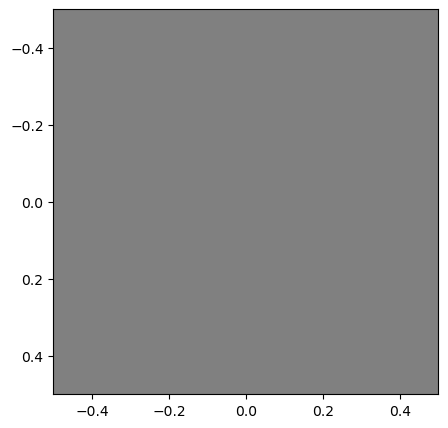

In [102]:
# dist_on_skel = distance * skel
i=30
fig, ax = plt.subplots()
x=1000
y=1000
plt.imshow(props[i].image,zorder=2,alpha=0.5,cmap=mpl.cm.gray)

conts=measure.find_contours(props[i].image,0.8)
skel=morphology.skeletonize(props[i].image)
img_ind=np.where(skel)

# ax.imshow(img,alpha=0.5,zorder=2,cmap=mpl.cm.gray)
# ax.imshow(invert(skel),cmap=mpl.cm.gray,zorder=1)
for contour in conts:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1,color='black',zorder=2)

# ax.set_ylim(x,x+1000)
# ax.set_xlim(y,y+1000)
plt.scatter(img_ind[1],img_ind[0],s=1)

In [54]:
from skimage.morphology import (erosion, dilation, opening, closing,  # noqa
                                white_tophat, disk)
footprint = disk(15)
dilation=dilation(invert(img), footprint)

# closing= closing(invert(img), footprint)


(0.0, 1000.0)

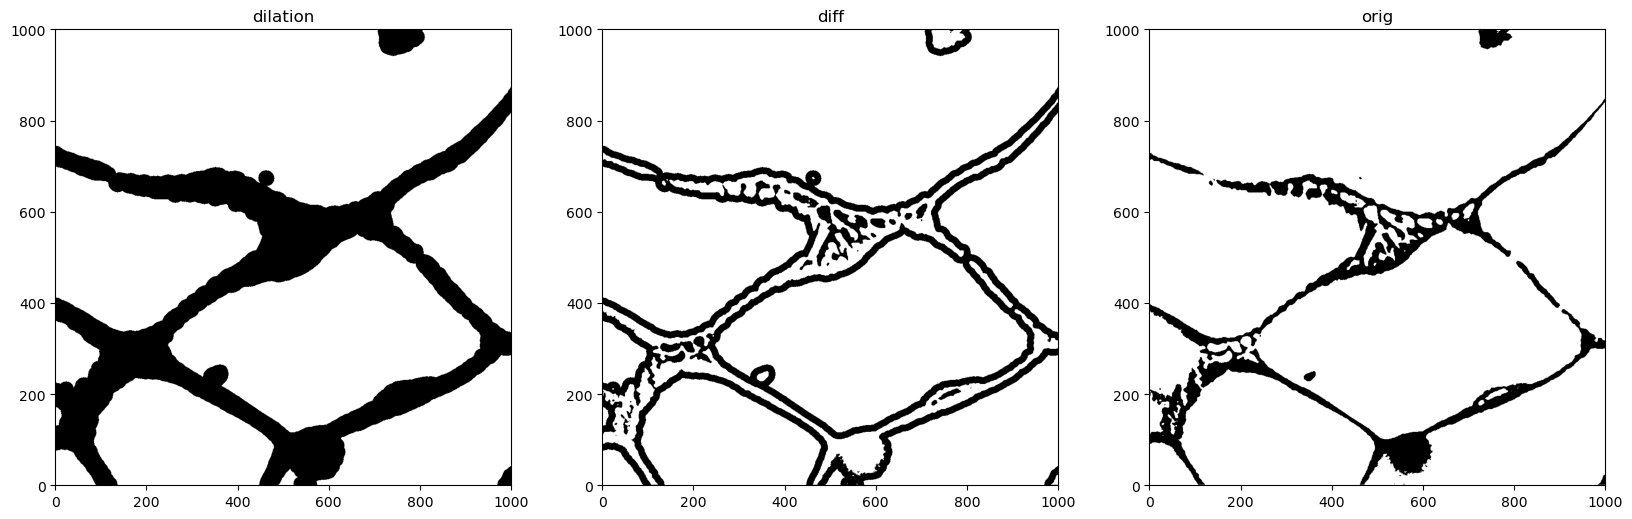

In [65]:
fig,ax=plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(dilation,cmap='binary')
ax[0].set_title('dilation')
ax[0].set_xlim([0,1000])
ax[0].set_ylim([0,1000])
ax[1].imshow(dilation-invert(img),cmap='binary')
ax[1].set_title('diff')
ax[1].set_xlim([0,1000])
ax[1].set_ylim([0,1000])
ax[2].imshow(img,cmap='gray')
ax[2].set_title('orig')
ax[2].set_xlim([0,1000])
ax[2].set_ylim([0,1000])

(0.0, 1000.0)

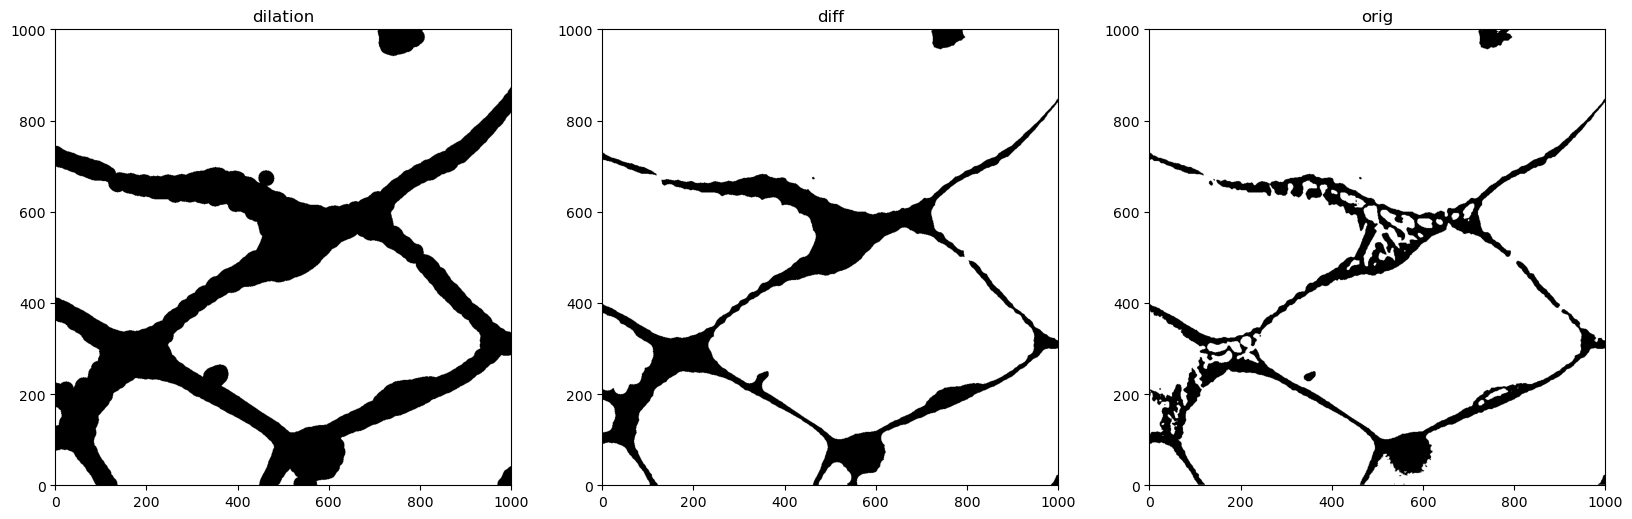

In [66]:
fig,ax=plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(dilation,cmap='binary')
ax[0].set_title('dilation')
ax[0].set_xlim([0,1000])
ax[0].set_ylim([0,1000])
# footprint = disk(15)
erosion=erosion(dilation, footprint)
ax[1].imshow(erosion,cmap='binary')
ax[1].set_title('diff')
ax[1].set_xlim([0,1000])
ax[1].set_ylim([0,1000])
ax[2].imshow(img,cmap='gray')
ax[2].set_title('orig')
ax[2].set_xlim([0,1000])
ax[2].set_ylim([0,1000])

(0.0, 1500.0)

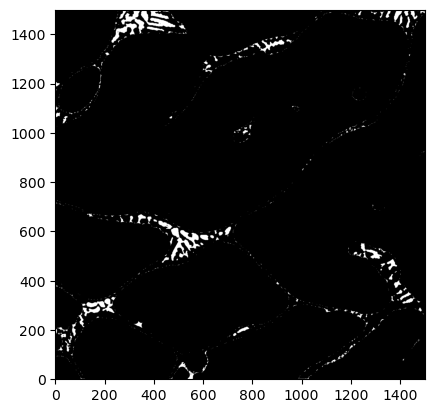

In [70]:
plt.imshow(erosion-invert(img),cmap='gray')
plt.xlim([0,1500])
plt.ylim([000,1500])

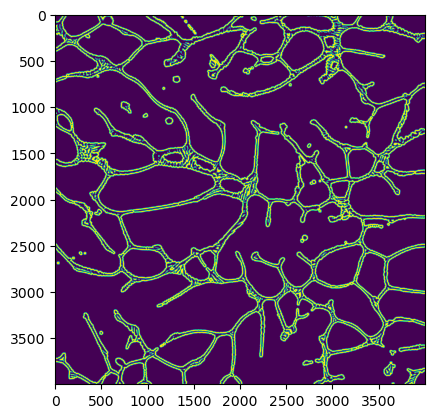

In [64]:
plt.imshow(dilation-invert(img))

In [40]:
# l_img=morphology.label(invert(img))
l_img=morphology.label(invert(closing))
properties=['label','bbox','area','area_convex','euler_number','image']
props=measure.regionprops_table(l_img,closed,properties=properties)
df=pd.DataFrame(props)
df

,label,bbox-0,bbox-1,bbox-2,bbox-3,area,area_convex,euler_number,image
0,1,0,0,94,107,7126,7241,1,"[[True, True, True, True, True, True, True, Tr..."
1,2,0,70,251,496,79780,80656,1,"[[False, False, False, False, False, False, Fa..."
2,3,0,473,303,1263,125514,139355,-1,"[[True, True, True, True, True, True, True, Tr..."
3,4,0,1027,289,1965,163669,171105,-11,"[[True, True, True, True, True, True, True, Tr..."
4,5,0,1901,453,2494,179045,214284,0,"[[False, False, False, False, False, False, Fa..."
...,...,...,...,...,...,...,...,...,...
112,113,3850,3873,4000,4000,13752,14322,1,"[[False, False, False, False, False, False, Fa..."
113,114,3859,3582,3888,3607,540,568,1,"[[False, False, False, False, False, False, Fa..."
114,115,3975,3825,4000,3871,758,799,1,"[[False, False, False, False, False, False, Fa..."
115,116,3982,930,4000,1006,1045,1086,1,"[[False, False, False, False, False, False, Fa..."


Text(0.5, 1.0, 'closing')

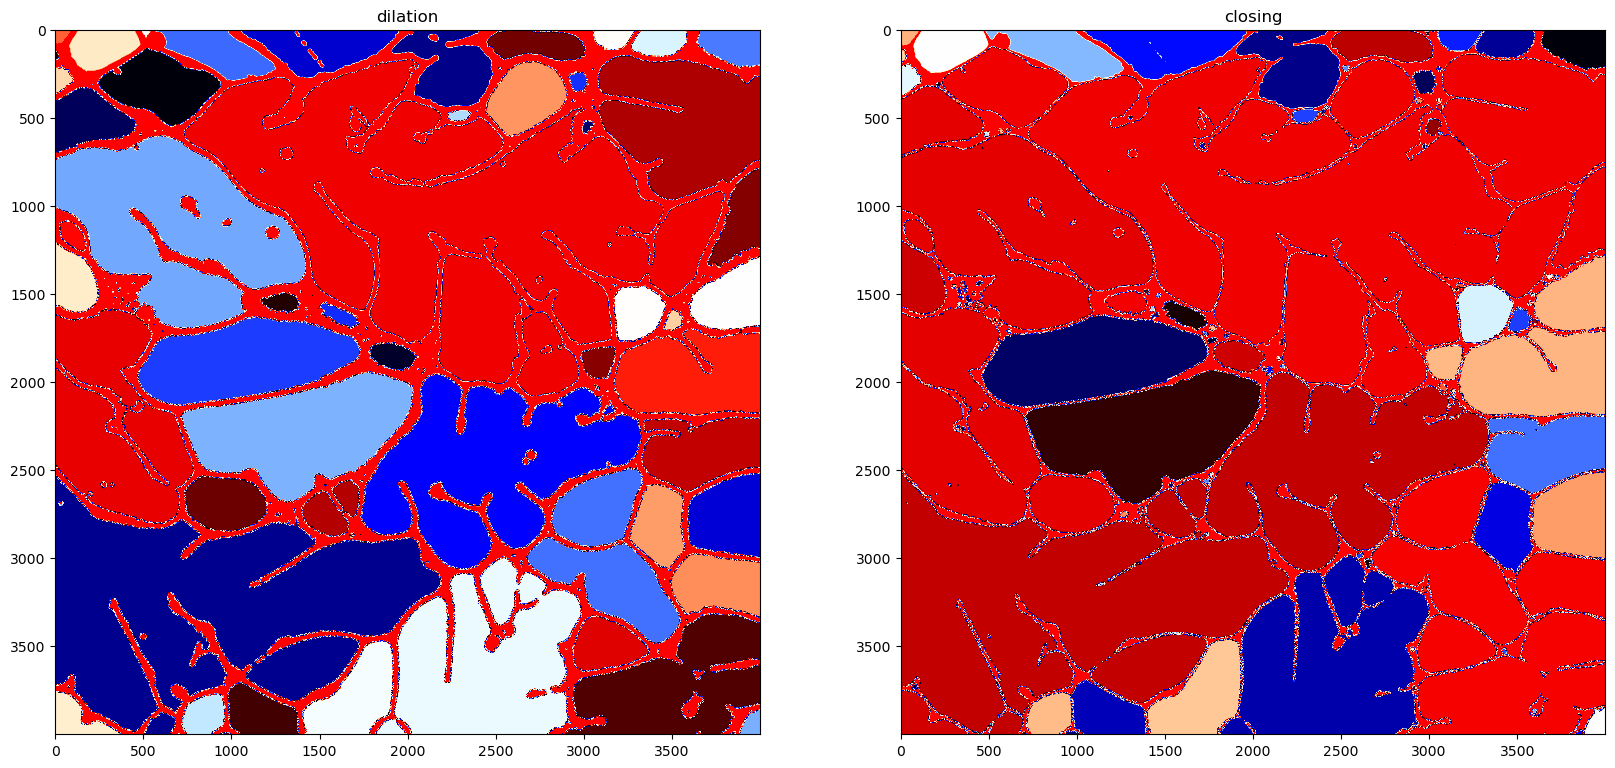

In [46]:
l_img_c=morphology.label(invert(closing))
l_img_d=morphology.label(invert(dilation))
# plt.imshow(l_img,cmap='flag')
fig,ax=plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(l_img_d,cmap='flag')
ax[0].set_title('dilation')
# ax[0].set_xlim([0,1000])
# ax[0].set_ylim([0,1000])
ax[1].imshow(l_img_c,cmap='flag')
ax[1].set_title('closing')
# ax[1].set_xlim([0,1000])
# ax[1].set_ylim([0,1000])
# ax[2].imshow(img,cmap='gray')
# ax[2].set_title('orig')
# ax[2].set_xlim([0,1000])
# ax[2].set_ylim([0,1000])

In [24]:
img_rem=morphology.remove_small_objects(img,min_size=500)


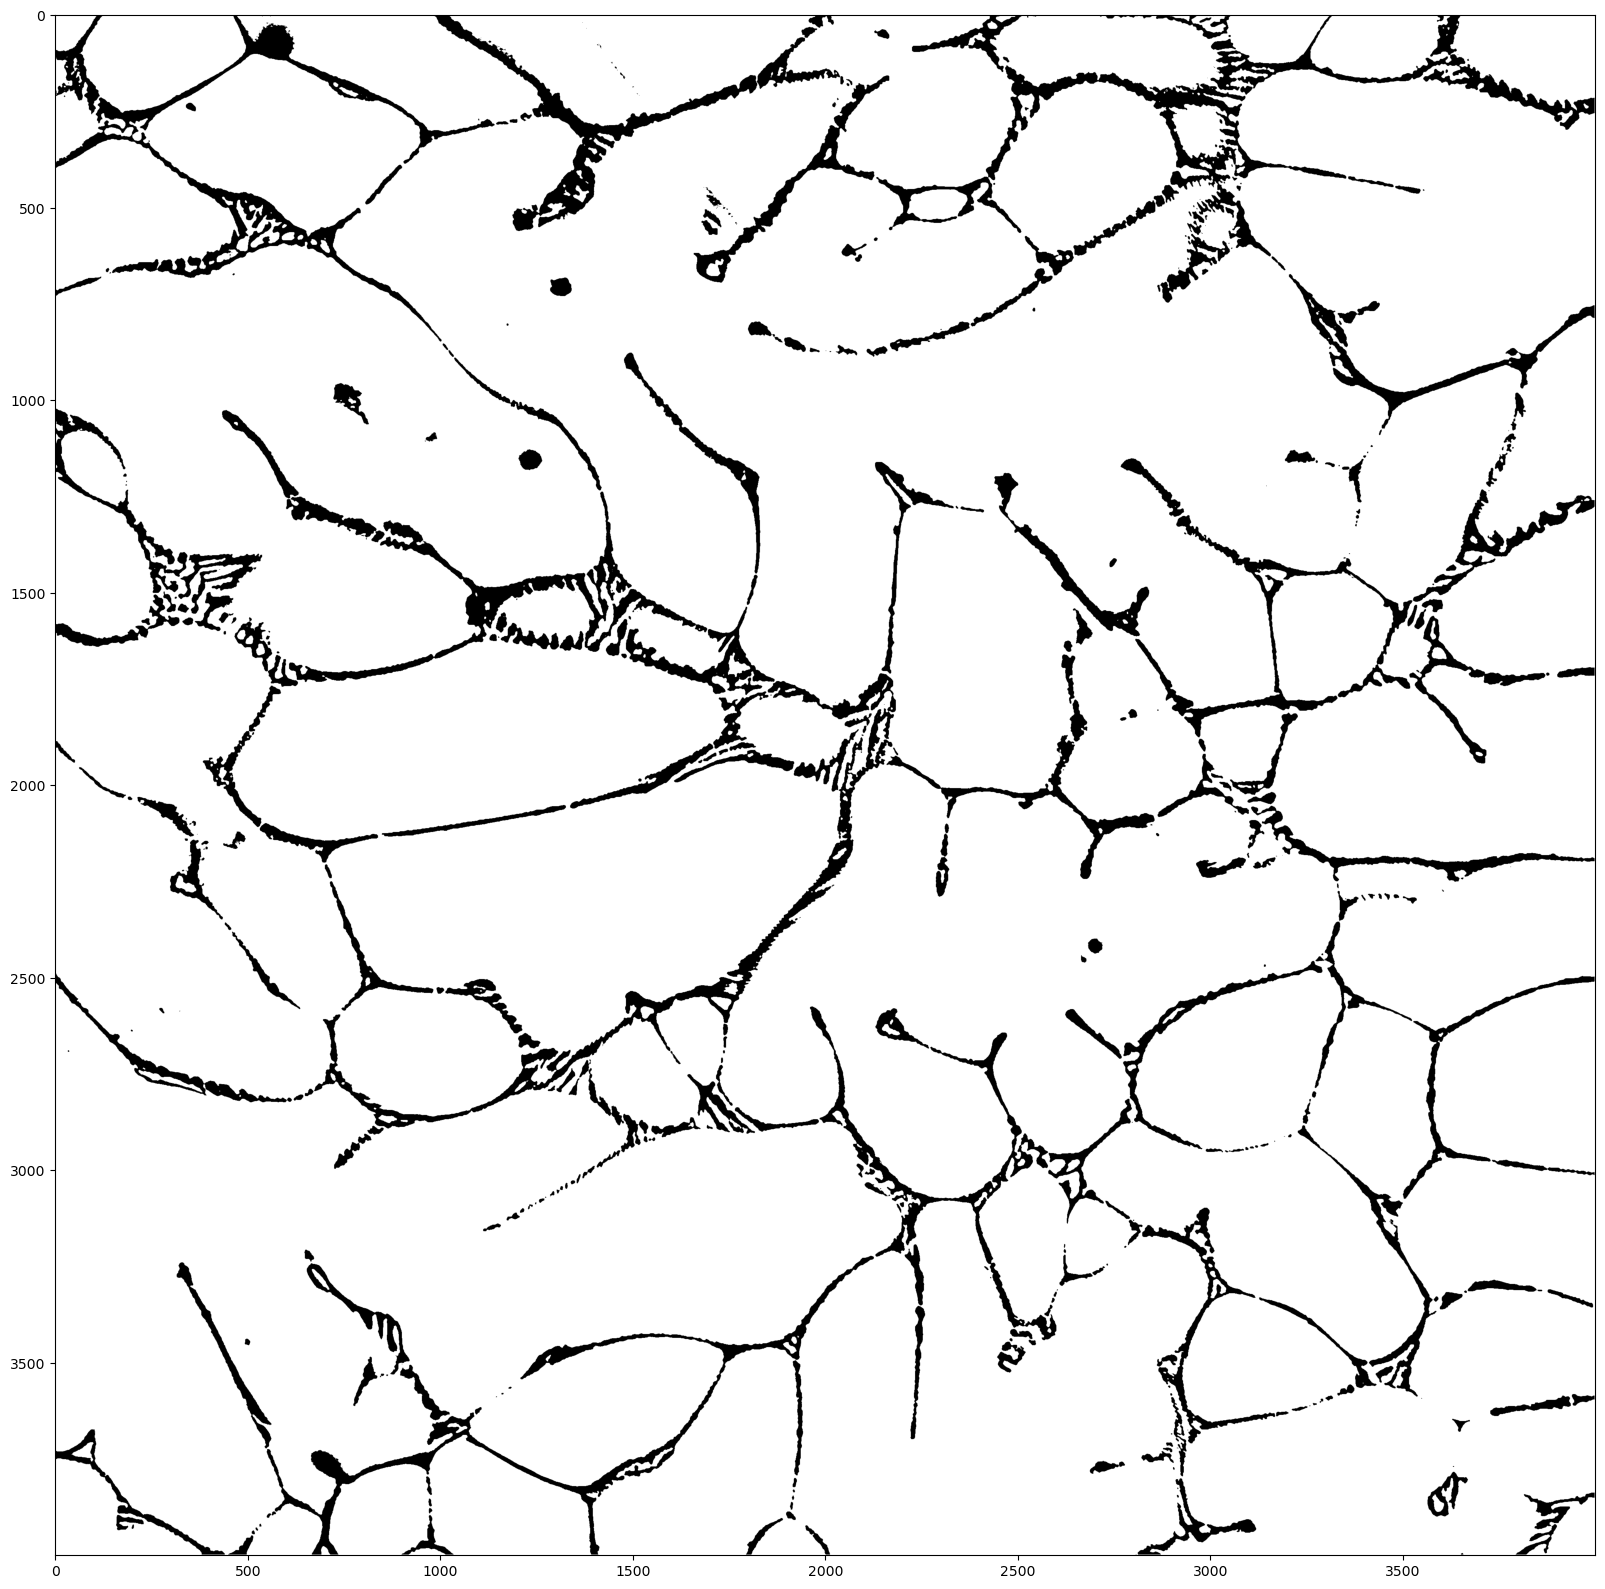

In [147]:
fig,ax=plt.subplots(figsize=(20,20))
ax.imshow(img,cmap='gray')

Text(0.5, 1.0, '0< euler_number<1')

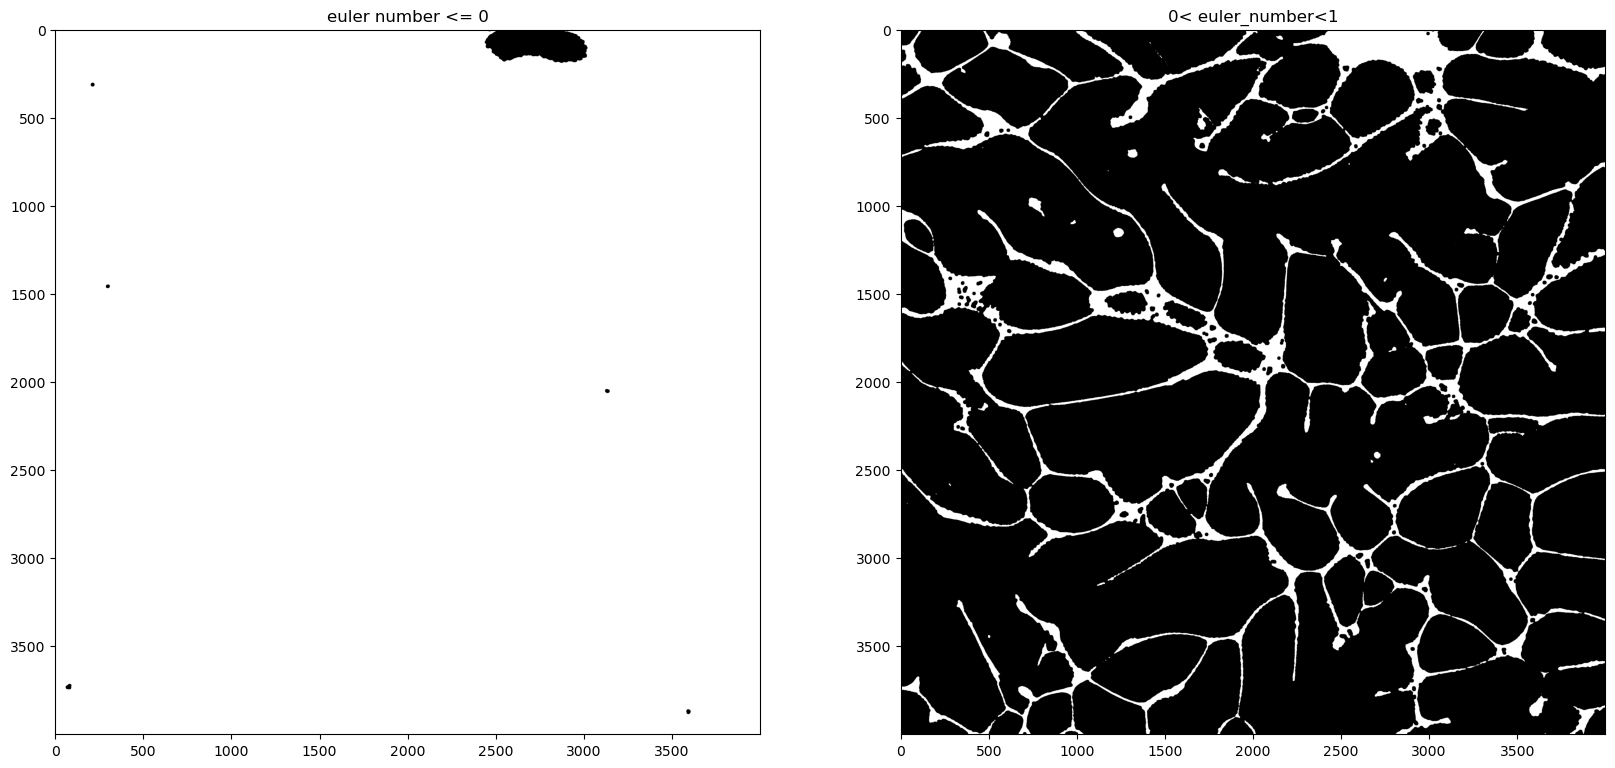

In [49]:
props=measure.regionprops_table(l_img_d,dilation,properties=properties)
df=pd.DataFrame(props)
import pandas as pd
df=pd.DataFrame(props)
df2=df[df['euler_number']<=0]
df2['label']
df3=df[(df['euler_number']<=1) & (df['euler_number']>0)]


eul_neg=np.isin(l_img,df2['label'].values)
eul_neg2=np.isin(l_img,df3['label'].values)
fig,ax=plt.subplots(1,2,figsize=(20,20))
ax[0].imshow(eul_neg,cmap='binary')
ax[0].set_title('euler number <= 0')
ax[1].imshow(eul_neg2,cmap='binary')
ax[1].set_title('0< euler_number<1')
# p

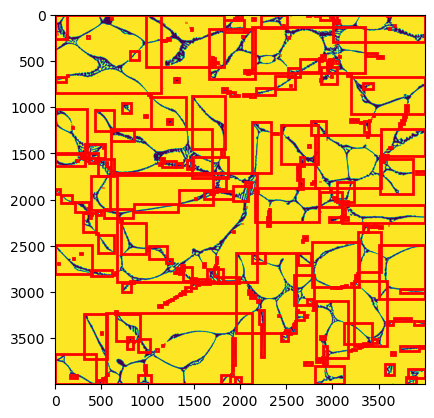

In [15]:

import matplotlib.patches as mpatches
fig,ax=plt.subplots()
ax.imshow(img)
for region in measure.regionprops(l_img):
    # take regions with large enough areas
    if region.area >= 10:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
plt.show()

In [16]:

imi=props[10].bbox
imi

(0, 2640, 1, 2645)

In [17]:

from matplotlib.colors import LinearSegmentedColormap

ncolors = 256
color_array = plt.get_cmap('gray')(range(ncolors))

# change alpha values
color_array[:,-1] = np.linspace(0.0,1.0,ncolors)

# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha',colors=color_array)
# plt.register_cmap(map_object)

NameError: name 'out' is not defined

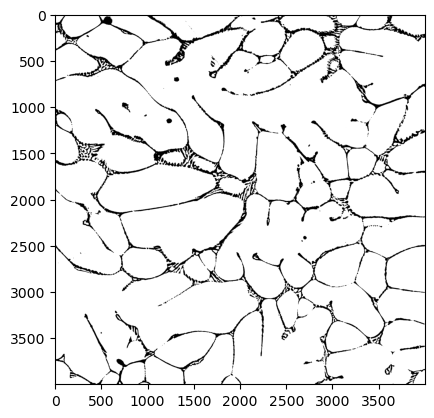

In [18]:
# figure
plt.imshow(img,cmap=plt.cm.gray)
plt.imshow((out),cmap=map_object)
# plt.imshow()


In [19]:
out

NameError: name 'out' is not defined

In [20]:
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1)
    

In [21]:
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(5,5)

[]

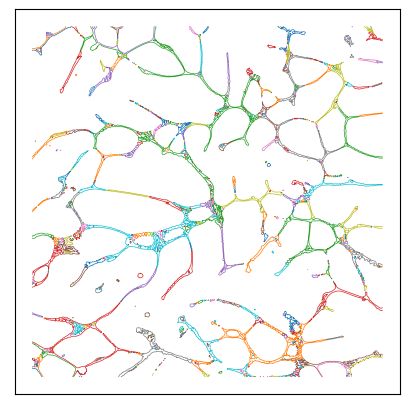

In [25]:
fig, ax = plt.subplots()
# ax.imshow(r, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=0.5)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])